# Implementing a Standard ANN with the Churn Modelling Dataset

Importing Libraries

In [ ]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# checking for null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <a list of 20 Patch objects>)

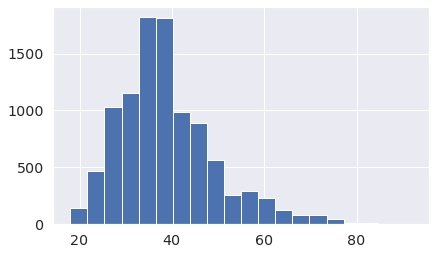

In [ ]:
plt.hist(df['Age'], bins = 20)

In [ ]:
df=pd.get_dummies(df, columns=['Geography','Gender'])

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Geography_France   10000 non-null  uint8  
 13  Geography_Germany  10000 non-null  uint8  
 14  Geography_Spain    10000 non-null  uint8  
 15  Gender_Female      10000 non-null  uint8  
 16  Gender_Male        1000

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
# Dropping columns which either don't help in prediction or can be used to identify individuals from Dataset 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Creating Test Data (100 Samples to be used later)

In [ ]:
test_ex1 = df[df["Exited"]==1].sample(50)

In [ ]:
test_ex0 = df[df["Exited"]==0].sample(50)

In [ ]:
final_test_df = pd.concat([test_ex1, test_ex0])

In [ ]:
final_test_df.to_csv("Test_Churn.csv", index=False)

In [ ]:
train_val_df = df.drop(test_ex1.index.append(test_ex0.index))

In [ ]:
train_val_df.to_csv("Train_Val_Churn.csv", index=False)

Using Train Data for Split

In [ ]:
new_df = pd.read_csv("Train_Val_Churn.csv")

In [ ]:
X = df.loc[:, df.columns != 'Exited']

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
y = df["Exited"].astype('float')

In [ ]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

## Age Modification for Differentially Private

## Age Modification

### Nearest 5
### Interval Average
### Nearest 10 

In [ ]:
df['Age'] -= df['Age'] % 10

In [ ]:
df = df.drop(columns=["Age"], axis=1) #Tried Dropping, reduces from 85 to 82, not very significant

Test Set Ready

In [ ]:
new_test_df = pd.read_csv("Test_Churn.csv")

In [ ]:
X_test = new_test_df.loc[:, new_test_df.columns != 'Exited']

In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,799,63,1,110314.21,2,1,0,37464.00,1,0,0,1,0
1,570,29,4,153040.03,1,1,1,131363.57,1,0,0,1,0
2,736,57,9,95295.39,1,1,0,28434.44,0,1,0,0,1
3,686,47,6,0.00,1,1,0,32080.69,0,0,1,1,0
4,624,45,3,68639.57,1,1,0,168002.31,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,601,41,1,0.00,2,0,1,160607.06,1,0,0,1,0
96,613,36,9,131307.11,1,0,0,83343.73,1,0,0,0,1
97,465,24,6,156007.09,1,1,0,191368.37,0,1,0,0,1
98,774,35,3,121418.62,1,1,1,24400.37,1,0,0,1,0


In [ ]:
y_test = new_test_df["Exited"].astype('float')

In [ ]:
y_test.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Exited, dtype: float64

Run After Age Modification

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 1, stratify=y)


In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
861,548,32,2,172448.77,1,1,0,188083.77,1,0,0,1,0
3285,735,43,9,98807.45,1,0,0,184570.04,0,1,0,1,0
7532,760,33,1,118114.28,2,0,1,156660.21,0,0,1,1,0
1845,737,36,9,0.00,1,0,1,188670.90,1,0,0,0,1
8051,605,56,1,74129.18,2,1,1,62199.78,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,573,35,9,134498.54,2,1,1,119924.80,0,1,0,0,1
6278,602,72,3,0.00,2,1,1,171260.66,1,0,0,1,0
3361,602,48,7,76595.08,2,0,0,127095.14,0,1,0,1,0
9357,418,46,9,0.00,1,1,1,81014.50,1,0,0,1,0


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
# For final test scale and predict with train scaler

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
callback = keras.callbacks.EarlyStopping(patience=40, restore_best_weights=True)

In [ ]:
 import time, datetime

In [ ]:
# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(18, kernel_initializer = 'normal', activation = 'relu', input_shape = (13, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(14, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.05))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 
start = datetime.datetime.now()
model_history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 150, callbacks = [callback])
end = datetime.datetime.now()
print("Overall Training Time: ", (end - start))

Epoch 1/150
279/279 [==============================] - 2s 4ms/step - loss: 0.5956 - accuracy: 0.7150 - val_loss: 0.5378 - val_accuracy: 0.7889
Epoch 2/150
279/279 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.8116 - val_loss: 0.3928 - val_accuracy: 0.8394
Epoch 3/150
279/279 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8329 - val_loss: 0.3667 - val_accuracy: 0.8505
Epoch 4/150
279/279 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8367 - val_loss: 0.3529 - val_accuracy: 0.8616
Epoch 5/150
279/279 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8384 - val_loss: 0.3563 - val_accuracy: 0.8576
Epoch 6/150
279/279 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8412 - val_loss: 0.3606 - val_accuracy: 0.8495
Epoch 7/150
279/279 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8440 - val_loss: 0.3500 - val_accuracy: 0.8596

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 18)                252       
                                                                 
 dropout_51 (Dropout)        (None, 18)                0         
                                                                 
 batch_normalization_51 (Bat  (None, 18)               72        
 chNormalization)                                                
                                                                 
 dense_66 (Dense)            (None, 14)                266       
                                                                 
 dropout_52 (Dropout)        (None, 14)                0         
                                                                 
 batch_normalization_52 (Bat  (None, 14)               56        
 chNormalization)                                    

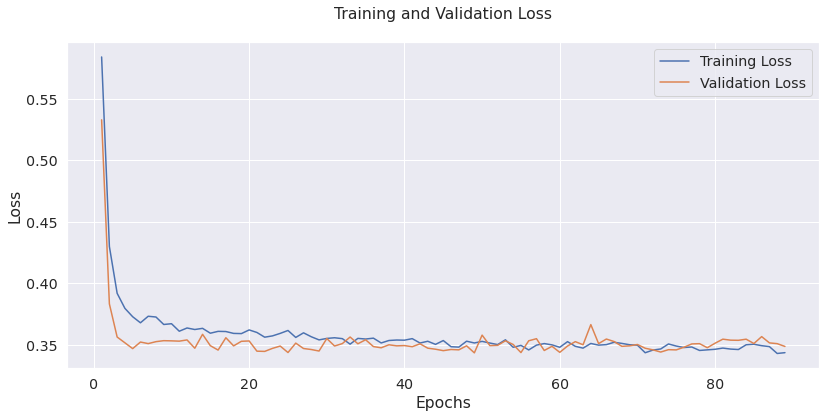

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
num_epochs = len(model_history.history['val_loss'])
epoch = [i for i in range(1, num_epochs + 1)]
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

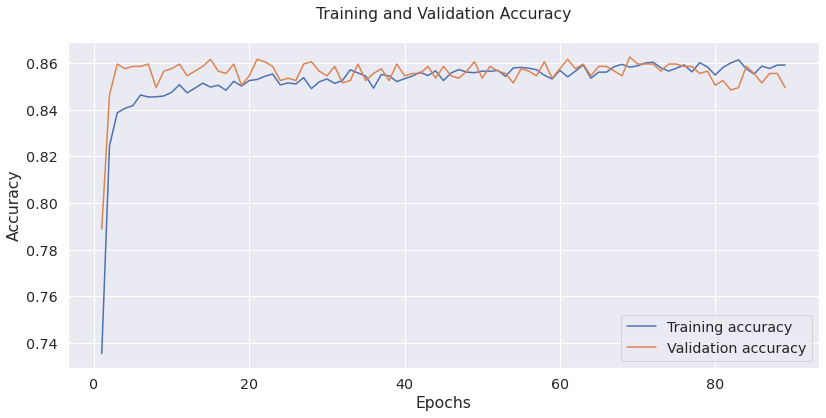

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
num_epochs = len(model_history.history['val_loss'])
epoch = [i for i in range(1, num_epochs + 1)]
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

4/4 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8900
Accuracy of model is 0.8899999856948853


In [ ]:
threshold = 0.5
y_prob = model.predict(X_test)
y_pred = np.where(y_prob >= threshold, 1,0)

In [ ]:
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import precision_recall_fscore_support

Text(0.5, 1.0, 'Churn Modelling Confusion Matrix')

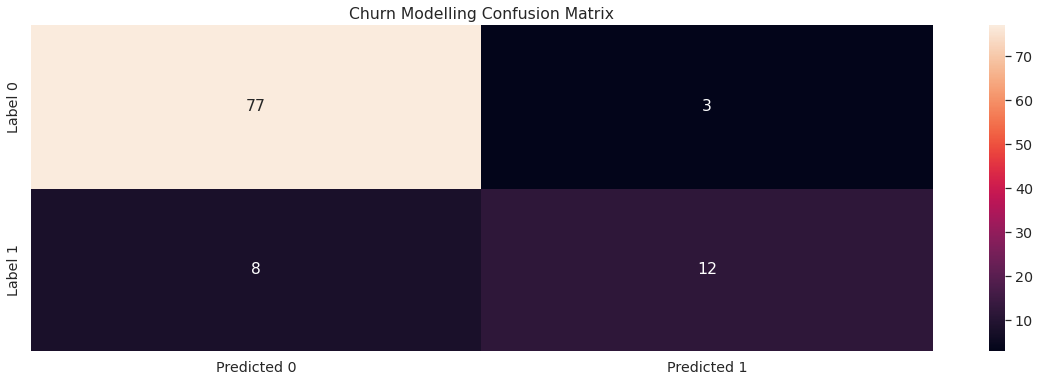

In [ ]:
# Confusion Matrix for Basic Logistic Regression Model
conf_Log = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_Log, index = ['Label 0','Label 1'],columns = ['Predicted 0','Predicted 1'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Churn Modelling Confusion Matrix')

In [ ]:
# Precision: Whenever Model Predicts True, how many times it is actually true
# Recall: Out of all True, how many did the Model find out

# Precision:   True Positives/(True Positives + False Positives)
# Recall:   True Positives/(True Positives + False Negatives)

TP = conf_Log[1][1]
FP = conf_Log[0][1]
TN = conf_Log[0][0]
FN = conf_Log[1][0]

In [ ]:
Precision_Metric = TP/(TP + FP)
print("Precision is:", Precision_Metric)

Precision is: 0.8


In [ ]:
Recall_Metric = TP/(TP + FN)
print("Recall is:", Recall_Metric)

Recall is: 0.6


In [ ]:
F1_Metric = (2*Precision_Metric*Recall_Metric)/(Precision_Metric + Recall_Metric)
print("F1 Score is:", F1_Metric)

F1 Score is: 0.6857142857142857


In [ ]:
#model.save_weights("model_normal_ANN_Age.h5")